# Imports

In [0]:
%tensorflow_version 2.x

import tensorflow as tf

#from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

#dark mode
plt.rc_context({'xtick.color':'w', 'ytick.color':'w', 'text.color':'w', 'axes.labelcolor':'w'})

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

# Working with a dataset

##Load and explore the dataset

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [0]:
#class_names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']



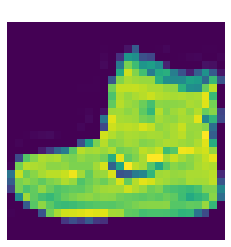

In [7]:
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]])
plt.axis('off')
plt.show()

## Transform
Convert to grayscale, normalize & standarize

In [8]:
train_images = (train_images-np.mean(train_images)) / np.std(train_images)
#train_images = tf.squeeze(tf.image.rgb_to_grayscale(train_images / 255.0))
train_images = tf.squeeze(train_images / 255.0)

test_images = (test_images-np.mean(test_images)) / np.std(test_images)
#test_images = tf.squeeze(tf.image.rgb_to_grayscale(test_images / 255.0))
test_images = tf.squeeze(test_images / 255.0)

train_images.shape, test_images.shape

(TensorShape([60000, 28, 28]), TensorShape([10000, 28, 28]))

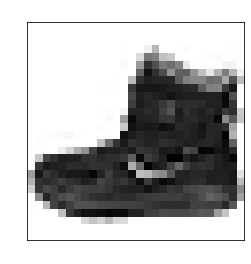

In [9]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.title(class_names[train_labels[0]])
plt.show()

## Explore final dataset

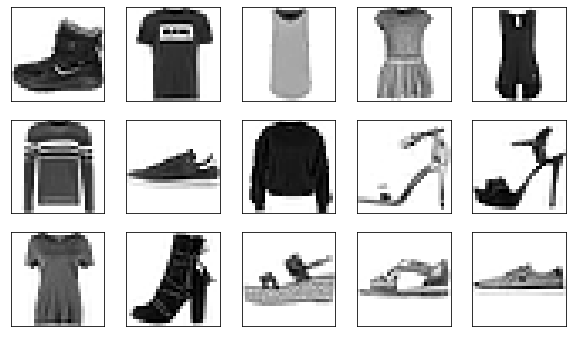

In [10]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color='w')
plt.show()

# Build the model

In [0]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(1024, activation='relu'),
    Dense(512, activation='sigmoid'),
    Dense(10, activation='softmax')
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_36 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_37 (Dense)             (None, 10)                5130      
Total params: 2,383,370
Trainable params: 2,383,370
Non-trainable params: 0
_________________________________________________________________


In [93]:
history = model.fit(train_images, 
          train_labels, 
          validation_split=0.3,
          epochs=20
          )

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 20s 479us/sample - loss: 2.0206 - accuracy: 0.1296 - val_loss: 1.7861 - val_accuracy: 0.0999
Epoch 2/20
42000/42000 [==============================] - 20s 475us/sample - loss: 1.7602 - accuracy: 0.1009 - val_loss: 1.7424 - val_accuracy: 0.0999
Epoch 3/20
42000/42000 [==============================] - 20s 481us/sample - loss: 1.7766 - accuracy: 0.1008 - val_loss: 1.7188 - val_accuracy: 0.0999
Epoch 4/20
42000/42000 [==============================] - 21s 496us/sample - loss: 1.6874 - accuracy: 0.1079 - val_loss: 1.6711 - val_accuracy: 0.1001
Epoch 5/20
42000/42000 [==============================] - 20s 482us/sample - loss: 1.6700 - accuracy: 0.1019 - val_loss: 1.6524 - val_accuracy: 0.1001
Epoch 6/20
42000/42000 [==============================] - 20s 484us/sample - loss: 4.4865 - accuracy: 0.1007 - val_loss: 4.8444 - val_accuracy: 0.0999
Epoch 7/20
42000/42000 [====================

# Evaluate

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),0.7])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.setp(plt.legend().get_texts(), color='black')
plt.ylabel('Cross Entropy')
plt.ylim([0.5,2.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [89]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('Loss:', test_loss)
print('Accuracy:', test_acc)

RuntimeError: ignored

# Make predictions

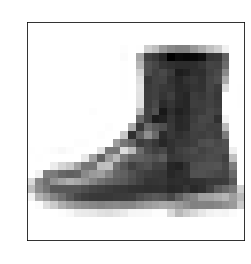


Predicted class is: Ankle boot


In [84]:
img_index = np.random.randint(test_images.shape[0])
img = test_images[img_index]

predictions = model.predict(tf.expand_dims(img, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(class_names[test_labels[img_index]])
plt.show()
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])


Predicted class is: Bag


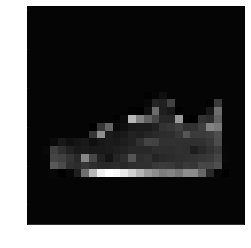

In [85]:
test_image = tf.keras.utils.get_file('sneaker.jpg','https://c.static-nike.com/a/images/c_limit,w_318,f_auto/t_product_v1/jomszuqr8gw3h18xhpro/air-force-1-07-mens-shoe-JkTGzADv.jpg')
test_image = Image.open(test_image).resize((28,28)).convert('L')
test_image = np.array(test_image)/255.0
predictions = model.predict(tf.expand_dims(test_image, 0))

plt.imshow(test_image, cmap=plt.cm.binary)
print('\nPredicted class is:', class_names[np.argmax(predictions[0])])